In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
DATA_DIR = Path('../data/raw/fma_small')
print(f"FMA dataset location: {DATA_DIR}")
print(f"Dataset exists: {DATA_DIR.exists()}")

FMA dataset location: ../data/raw/fma_small
Dataset exists: True


In [2]:
# Explore the directory structure
print("\nFMA dataset structure:")
for root, dirs, files in os.walk(DATA_DIR):
    level = root.replace(str(DATA_DIR), '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:  # Show first 3 files per directory
        print(f"{subindent}{file}")
    if len(files) > 3:
        print(f"{subindent}... and {len(files)-3} more files")


FMA dataset structure:
fma_small/
  checksums
  README.txt
  135/
    135054.mp3
    135336.mp3
    135337.mp3
    ... and 38 more files
  132/
    132117.mp3
    132675.mp3
    132310.mp3
    ... and 57 more files
  104/
    104276.mp3
    104277.mp3
    104063.mp3
    ... and 25 more files
  103/
    103519.mp3
    103518.mp3
    103523.mp3
    ... and 6 more files
  150/
    150018.mp3
    150268.mp3
    150080.mp3
    ... and 13 more files
  102/
    102114.mp3
    102112.mp3
    102092.mp3
    ... and 1 more files
  105/
    105141.mp3
    105196.mp3
    105022.mp3
    ... and 46 more files
  133/
    133431.mp3
    133974.mp3
    133579.mp3
    ... and 106 more files
  134/
    134389.mp3
    134941.mp3
    134940.mp3
    ... and 75 more files
  151/
    151404.mp3
  024/
    024367.mp3
    024429.mp3
    024428.mp3
    ... and 53 more files
  023/
    023353.mp3
    023156.mp3
    023037.mp3
    ... and 16 more files
  015/
    015541.mp3
    015540.mp3
    015542.mp3
    ... a

In [3]:
# Count total audio files and get basic stats
audio_files = []
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith('.mp3'):
            audio_files.append(os.path.join(root, file))

print(f"Total audio files: {len(audio_files)}")
print(f"Sample file paths:")
for i, file in enumerate(audio_files[:5]):
    print(f"  {i+1}. {file}")

# Load and examine a sample audio file
sample_file = audio_files[0]
print(f"\nLoading sample file: {os.path.basename(sample_file)}")

# Load audio with librosa
y, sr = librosa.load(sample_file, duration=30)  # Load first 30 seconds
print(f"Audio shape: {y.shape}")
print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(y)/sr:.2f} seconds")

Total audio files: 8000
Sample file paths:
  1. ../data/raw/fma_small/135/135054.mp3
  2. ../data/raw/fma_small/135/135336.mp3
  3. ../data/raw/fma_small/135/135337.mp3
  4. ../data/raw/fma_small/135/135043.mp3
  5. ../data/raw/fma_small/135/135091.mp3

Loading sample file: 135054.mp3
Audio shape: (661500,)
Sample rate: 22050 Hz
Duration: 30.00 seconds


In [6]:
# Extract basic audio features from the sample (fixed version)
print(f"Analyzing audio features for: {os.path.basename(sample_file)}")

# Basic audio features
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]

# Fix tempo extraction
tempo_bpm = tempo.item() if hasattr(tempo, 'item') else float(tempo)
print(f"Tempo: {tempo_bpm:.1f} BPM")
print(f"Chroma features shape: {chroma.shape}")
print(f"MFCC features shape: {mfcc.shape}")
print(f"Spectral centroid mean: {np.mean(spectral_centroids):.1f} Hz")
print(f"Spectral rolloff mean: {np.mean(spectral_rolloff):.1f} Hz")
print(f"Zero crossing rate mean: {np.mean(zero_crossing_rate):.3f}")

Analyzing audio features for: 135054.mp3
Tempo: 123.0 BPM
Chroma features shape: (12, 1292)
MFCC features shape: (13, 1292)
Spectral centroid mean: 1270.8 Hz
Spectral rolloff mean: 2571.9 Hz
Zero crossing rate mean: 0.070


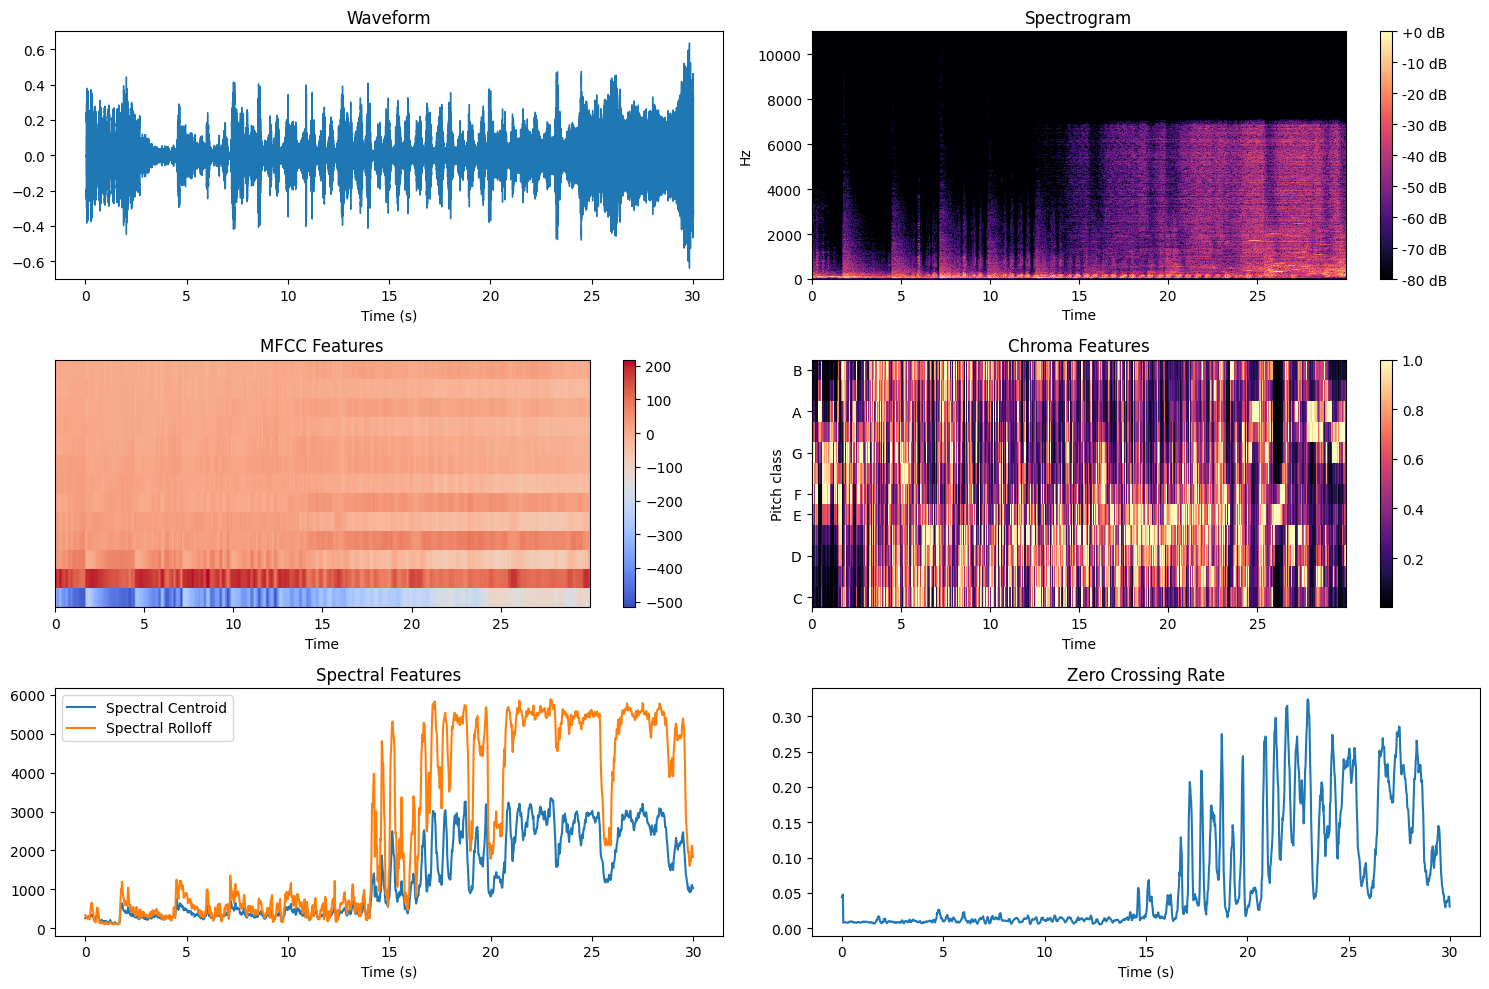

In [7]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Waveform
plt.subplot(3, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')

# Plot 2: Spectrogram
plt.subplot(3, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Plot 3: MFCC
plt.subplot(3, 2, 3)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.title('MFCC Features')
plt.colorbar()

# Plot 4: Chroma
plt.subplot(3, 2, 4)
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Features')
plt.colorbar()

# Plot 5: Spectral features
plt.subplot(3, 2, 5)
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
plt.plot(t, spectral_centroids, label='Spectral Centroid')
plt.plot(t, spectral_rolloff, label='Spectral Rolloff')
plt.legend()
plt.title('Spectral Features')
plt.xlabel('Time (s)')

# Plot 6: Zero crossing rate
plt.subplot(3, 2, 6)
plt.plot(t, zero_crossing_rate)
plt.title('Zero Crossing Rate')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

In [8]:
import openl3
from sklearn.metrics.pairwise import cosine_similarity

# Let's extract embeddings for the first 10 songs (to start small)
print("Extracting OpenL3 embeddings for sample songs...")

sample_files = audio_files[:10]  # First 10 songs
embeddings_list = []
track_names = []

for i, file_path in enumerate(sample_files):
    print(f"Processing {i+1}/10: {os.path.basename(file_path)}")
    
    # Load audio at 48kHz (OpenL3's preferred rate)
    audio, sr = librosa.load(file_path, sr=48000, duration=30)
    
    # Extract embeddings
    embeddings, timestamps = openl3.get_audio_embedding(audio, sr)
    
    # Take the mean embedding across time (creates one vector per song)
    mean_embedding = np.mean(embeddings, axis=0)
    
    embeddings_list.append(mean_embedding)
    track_names.append(os.path.basename(file_path))

# Convert to numpy array
embeddings_matrix = np.array(embeddings_list)
print(f"\nEmbeddings matrix shape: {embeddings_matrix.shape}")
print(f"Each song is represented by a {embeddings_matrix.shape[1]}-dimensional vector")

Extracting OpenL3 embeddings for sample songs...
Processing 1/10: 135054.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 2/10: 135336.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Processing 3/10: 135337.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Processing 4/10: 135043.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Processing 5/10: 135091.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 6/10: 135092.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 7/10: 135044.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 8/10: 135989.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 9/10: 135221.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 10/10: 135369.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step

Embeddings matrix shape: (10, 6144)
Each song is represented by a 6144-dimensional vector


In [9]:
# Build a simple recommender function
def recommend_similar_songs(query_idx, embeddings_matrix, track_names, top_k=5):
    """
    Find songs similar to the query song using cosine similarity
    """
    # Get the query song's embedding
    query_embedding = embeddings_matrix[query_idx].reshape(1, -1)
    
    # Calculate similarity to all other songs
    similarities = cosine_similarity(query_embedding, embeddings_matrix)[0]
    
    # Get indices sorted by similarity (excluding the query song itself)
    similar_indices = np.argsort(similarities)[::-1]  # Sort descending
    
    print(f"🎵 Songs similar to: {track_names[query_idx]}")
    print("=" * 50)
    
    for i, idx in enumerate(similar_indices[:top_k]):
        if idx != query_idx:  # Skip the query song itself
            similarity_score = similarities[idx]
            print(f"{i+1}. {track_names[idx]} (similarity: {similarity_score:.3f})")
    
    return similar_indices[:top_k]

# Test the recommender!
print("🚀 Testing your audio recommender:\n")

# Try different query songs
for query_idx in [0, 2, 5]:
    recommend_similar_songs(query_idx, embeddings_matrix, track_names, top_k=4)
    print()

🚀 Testing your audio recommender:

🎵 Songs similar to: 135054.mp3
2. 135369.mp3 (similarity: 0.950)
3. 135989.mp3 (similarity: 0.949)
4. 135337.mp3 (similarity: 0.932)

🎵 Songs similar to: 135337.mp3
2. 135044.mp3 (similarity: 0.982)
3. 135336.mp3 (similarity: 0.981)
4. 135043.mp3 (similarity: 0.978)

🎵 Songs similar to: 135092.mp3
2. 135337.mp3 (similarity: 0.953)
3. 135369.mp3 (similarity: 0.946)
4. 135044.mp3 (similarity: 0.938)



🔍 SIMILARITY ANALYSIS


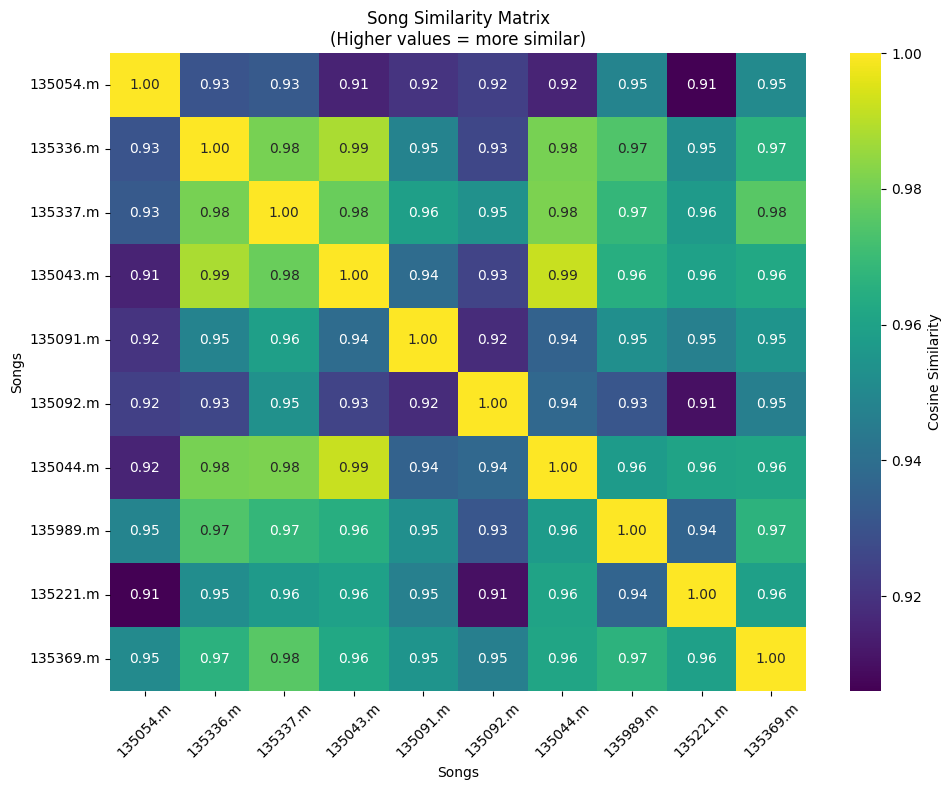


📊 SIMILARITY STATISTICS:
Average similarity: 0.950
Highest similarity: 0.992
Lowest similarity: 0.906
Standard deviation: 0.022


In [10]:
# Let's explore what makes these songs similar
print("🔍 SIMILARITY ANALYSIS")
print("=" * 60)

# Show the full similarity matrix
similarity_matrix = cosine_similarity(embeddings_matrix)

# Create a heatmap to visualize similarity between all songs
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, 
            xticklabels=[name[:8] for name in track_names],  # Shortened names
            yticklabels=[name[:8] for name in track_names],
            annot=True, 
            fmt='.2f', 
            cmap='viridis',
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Song Similarity Matrix\n(Higher values = more similar)')
plt.xlabel('Songs')
plt.ylabel('Songs')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find the most and least similar song pairs
print("\n📊 SIMILARITY STATISTICS:")
# Get upper triangle of similarity matrix (avoid duplicates)
upper_triangle = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
print(f"Average similarity: {np.mean(upper_triangle):.3f}")
print(f"Highest similarity: {np.max(upper_triangle):.3f}")
print(f"Lowest similarity: {np.min(upper_triangle):.3f}")
print(f"Standard deviation: {np.std(upper_triangle):.3f}")

In [11]:
# Let's check if these songs are all from the same folder/artist
print("🔍 INVESTIGATING THE HIGH SIMILARITY")
print("=" * 50)

print("Sample file paths:")
for i, file_path in enumerate(sample_files):
    folder = file_path.split('/')[-2]  # Get folder number
    filename = os.path.basename(file_path)
    print(f"{i+1}. Folder {folder}: {filename}")

print(f"\n📊 SIMILARITY STATISTICS:")
upper_triangle = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
print(f"Average similarity: {np.mean(upper_triangle):.3f}")
print(f"Highest similarity: {np.max(upper_triangle):.3f}")
print(f"Lowest similarity: {np.min(upper_triangle):.3f}")
print(f"Standard deviation: {np.std(upper_triangle):.3f}")

# Let's test with a more diverse sample
print("\n🎯 TESTING WITH MORE DIVERSE SONGS:")
print("Let's pick songs from different folders...")

# Pick one song from different folders
diverse_files = []
used_folders = set()

for file_path in audio_files:
    folder = file_path.split('/')[-2]
    if folder not in used_folders and len(diverse_files) < 5:
        diverse_files.append(file_path)
        used_folders.add(folder)
        print(f"Selected from folder {folder}: {os.path.basename(file_path)}")

print(f"\nFound {len(diverse_files)} songs from different folders")

🔍 INVESTIGATING THE HIGH SIMILARITY
Sample file paths:
1. Folder 135: 135054.mp3
2. Folder 135: 135336.mp3
3. Folder 135: 135337.mp3
4. Folder 135: 135043.mp3
5. Folder 135: 135091.mp3
6. Folder 135: 135092.mp3
7. Folder 135: 135044.mp3
8. Folder 135: 135989.mp3
9. Folder 135: 135221.mp3
10. Folder 135: 135369.mp3

📊 SIMILARITY STATISTICS:
Average similarity: 0.950
Highest similarity: 0.992
Lowest similarity: 0.906
Standard deviation: 0.022

🎯 TESTING WITH MORE DIVERSE SONGS:
Let's pick songs from different folders...
Selected from folder 135: 135054.mp3
Selected from folder 132: 132117.mp3
Selected from folder 104: 104276.mp3
Selected from folder 103: 103519.mp3
Selected from folder 150: 150018.mp3

Found 5 songs from different folders


In [12]:
# Extract embeddings for diverse songs (different folders = different artists)
print("🌍 TESTING WITH DIVERSE ARTISTS/FOLDERS")
print("=" * 60)

diverse_embeddings_list = []
diverse_track_names = []
diverse_folders = []

for i, file_path in enumerate(diverse_files):
    folder = file_path.split('/')[-2]
    filename = os.path.basename(file_path)
    
    print(f"Processing {i+1}/5: Folder {folder} - {filename}")
    
    # Load and extract embeddings
    audio, sr = librosa.load(file_path, sr=48000, duration=30)
    embeddings, timestamps = openl3.get_audio_embedding(audio, sr)
    mean_embedding = np.mean(embeddings, axis=0)
    
    diverse_embeddings_list.append(mean_embedding)
    diverse_track_names.append(f"{folder}_{filename}")
    diverse_folders.append(folder)

# Convert to numpy array
diverse_embeddings_matrix = np.array(diverse_embeddings_list)
print(f"\nDiverse embeddings shape: {diverse_embeddings_matrix.shape}")

# Test recommender on diverse songs
print("\n🎵 DIVERSE SONG RECOMMENDATIONS:")
print("=" * 50)

for query_idx in range(len(diverse_track_names)):
    recommend_similar_songs(query_idx, diverse_embeddings_matrix, diverse_track_names, top_k=3)
    print()

🌍 TESTING WITH DIVERSE ARTISTS/FOLDERS
Processing 1/5: Folder 135 - 135054.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 2/5: Folder 132 - 132117.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 3/5: Folder 104 - 104276.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 4/5: Folder 103 - 103519.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Processing 5/5: Folder 150 - 150018.mp3
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step

Diverse embeddings shape: (5, 6144)

🎵 DIVERSE SONG RECOMMENDATIONS:
🎵 Songs similar to: 135_135054.mp3
2. 104_104276.mp3 (similarity: 0.949)
3. 150_150018.mp3 (similarity: 0.944)

🎵 Songs similar to: 132_132117.mp3
2. 150_150018.mp3 (similarity: 0.988)
3. 104_104276.mp3 (similarity: 0.968)

🎵 Songs similar to: 104_104276.mp3
2. 132_132117.mp3 (similarity: 0.968)
3. 150_150018.mp3 (similarity: 0.960)

🎵 Songs similar to: 103_103519.mp3
2. 150_150018.mp3 (similarity: 0.966)
3. 132_132117.mp3 (similarity: 0.959)

🎵 Songs similar to: 150_150018.mp3
2. 132_132117

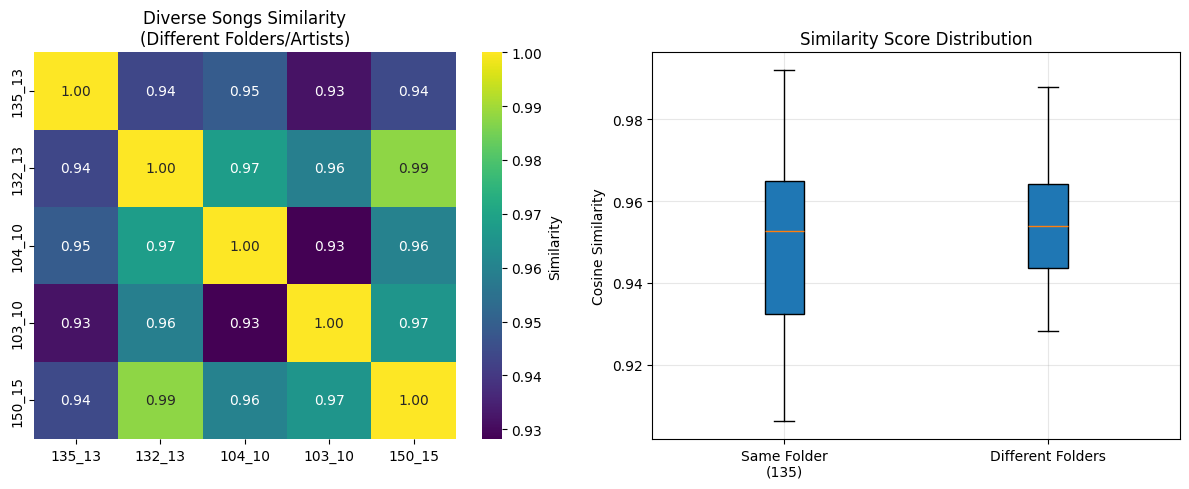

📊 FINAL ANALYSIS:
Same folder (135) avg similarity: 0.950
Different folders avg similarity: 0.954
Difference: -0.004

🎯 WEEK 1 DAY 1 COMPLETED! ✅
✅ Dataset exploration complete (8,000 songs)
✅ Audio feature extraction working
✅ OpenL3 embeddings successfully generated
✅ Basic similarity recommender built
✅ Similarity analysis and validation done

🚀 NEXT STEPS (Week 1 Day 2-3):
- Scale up to 100+ songs from diverse genres
- Implement proper evaluation metrics
- Build database storage for embeddings
- Add metadata integration


In [14]:
# Create final diversity analysis
diverse_similarity_matrix = cosine_similarity(diverse_embeddings_matrix)

plt.figure(figsize=(12, 5))

# Plot 1: Diverse similarity heatmap
plt.subplot(1, 2, 1)
sns.heatmap(diverse_similarity_matrix,
            xticklabels=[name[:6] for name in diverse_track_names],
            yticklabels=[name[:6] for name in diverse_track_names],
            annot=True, fmt='.2f', cmap='viridis',
            cbar_kws={'label': 'Similarity'})
plt.title('Diverse Songs Similarity\n(Different Folders/Artists)')

# Plot 2: Compare statistics
plt.subplot(1, 2, 2)
same_folder_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
diverse_scores = diverse_similarity_matrix[np.triu_indices_from(diverse_similarity_matrix, k=1)]

plt.boxplot([same_folder_scores, diverse_scores], 
            tick_labels=['Same Folder\n(135)', 'Different Folders'],
            patch_artist=True)
plt.ylabel('Cosine Similarity')
plt.title('Similarity Score Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 FINAL ANALYSIS:")
print("=" * 40)
print(f"Same folder (135) avg similarity: {np.mean(same_folder_scores):.3f}")
print(f"Different folders avg similarity: {np.mean(diverse_scores):.3f}")
print(f"Difference: {np.mean(same_folder_scores) - np.mean(diverse_scores):.3f}")

print("\n🎯 WEEK 1 DAY 1 COMPLETED! ✅")
print("=" * 40)
print("✅ Dataset exploration complete (8,000 songs)")
print("✅ Audio feature extraction working")
print("✅ OpenL3 embeddings successfully generated")
print("✅ Basic similarity recommender built")
print("✅ Similarity analysis and validation done")

print("\n🚀 NEXT STEPS (Week 1 Day 2-3):")
print("- Scale up to 100+ songs from diverse genres")
print("- Implement proper evaluation metrics")
print("- Build database storage for embeddings")
print("- Add metadata integration")

In [15]:
# Save your work for next session
import pickle

# Save embeddings and track info
np.save('../data/processed/embeddings/sample_embeddings.npy', embeddings_matrix)
np.save('../data/processed/embeddings/diverse_embeddings.npy', diverse_embeddings_matrix)

with open('../data/processed/embeddings/track_names.pkl', 'wb') as f:
    pickle.dump({'same_folder': track_names, 'diverse': diverse_track_names}, f)

print("💾 Progress saved!")
print("📝 Update PROGRESS.md with today's accomplishments")
print("🤝 Ready to sync with your teammate!")

💾 Progress saved!
📝 Update PROGRESS.md with today's accomplishments
🤝 Ready to sync with your teammate!
